# Practica 2 robots

In [6]:
import cv2
import numpy as np
import glob
import os
import matplotlib.pyplot as plt 
import pickle
import pathlib
import random



# directory = "D:\\Robots\\PracticaRobots2\\" # cambiar aqui
directory = '/home/angel/Escritorio/Máster/Robots/Practica2/PracticaRobots2/'

Para cargar un video y sacar capturas de él:

In [21]:
cap = cv2.VideoCapture(directory + 'landmarks_videos/landmarks_0.avi') # cambiar aqui

image_count = 0 

while(True):
    
    ret, frame = cap.read()
    
    if ret:

        cv2.imshow('habitacion_roja',frame)

        k = cv2.waitKey(500) # a mayor numero mas lento va
        
        if k & 0xFF == ord('q'):
            break

        if k==32:    # tecla espacio
            
            # ojito que esto sobreescribe si hay una imagen ya...
            cv2.imwrite(directory + "pruebas/prueba_estatico/landmark_0_" + str(image_count) + ".jpg", frame) # cambiar aqui
            image_count+=1
    else:
        break

    
cap.release()
cv2.destroyAllWindows()

Sacar los histogramas:

In [3]:
def load_images(filenames, gray_scale=True):
    """
        Load multiple images.
        
        Parameters:
            filename is an array of paths
            gray_scale whether the images will be load in gray scale or not 
            
        Returns:
            (images, images_name)
    """
    
    filenames.sort()
    images = []
    images_names = []
    
    u=0
    for img in filenames:
        if gray_scale:
            i = cv2.imread(img)
            gray = cv2.cvtColor(i, cv2.COLOR_BGR2GRAY)
            images.append(gray)
        else:
            images.append(cv2.imread(img))
            
        images_names.append(os.path.basename(filenames[u]))
        u+=1
    
    return (images, images_names)

Renombrar los landmarks: (ya no deberia usarse)

In [ ]:
estas_seguro = False

if estas_seguro: # por si acaso lo ejecutamos sin querer
    for l in range(1,10):
        f = 0
        for path in pathlib.Path(directory + 'landmarks_img/'+ str(l)).iterdir():
            if path.is_file():

                old_name = path.stem

                old_extension = path.suffix

                new_name = 'landmark_' + str(l-1) + '_frame_' + str(f) + old_extension

                path.rename(pathlib.Path(directory + 'landmarks_img/'+ str(l), new_name))
                f+=1


Se calculan los histogramas, se normalizan y se guardan en local

In [4]:
# codigo para cargar el archivo
def load_pickle(filename):
    return pickle.load(open(filename, 'rb'))



In [17]:
all_hist = []

output_dimension = (848, 480)

hist_dict = {}

for i in range(9):
    
    filenames = [img for img in glob.glob(directory + "landmarks_img/"+ str(i) + "/*.jpg")]
    filenames.sort()

    images    = [cv2.imread(img, cv2.IMREAD_GRAYSCALE) for img in filenames]
    img_names = [os.path.basename(img)                 for img in filenames]

    for i, img in enumerate(images):
        res_img = cv2.resize(img, output_dimension, interpolation=cv2.INTER_CUBIC)

        hist = cv2.calcHist([img],[0],None,[256],[0,256])
        hist_norm = hist / (output_dimension[0] * output_dimension[1])

        name = img_names[i]
        hist_dict[name] = hist_norm 

    print(len(hist_dict))

# guarda el objeto:
pickle.dump(hist_dict, open('landmarks_histograms/histogram_landmarks_.sav', 'wb'))
# por algun motivo no genera los .sav

97
293
388
573
666
774
904
1062
1158


Mostrar histograma:

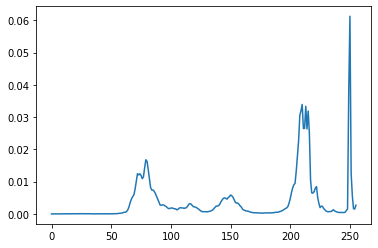

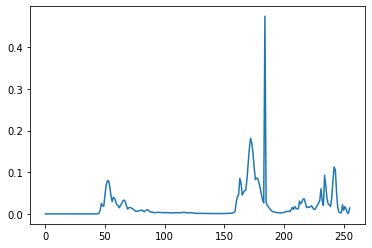

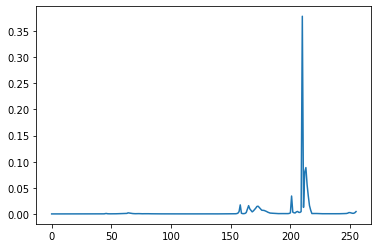

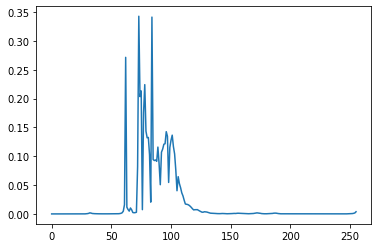

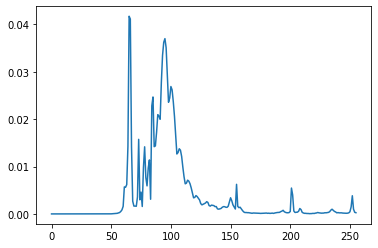

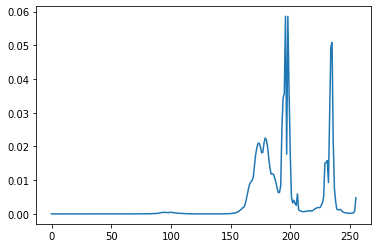

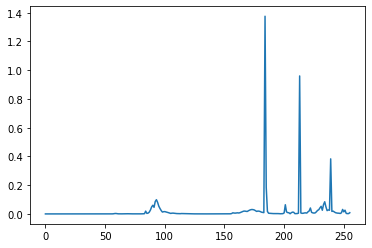

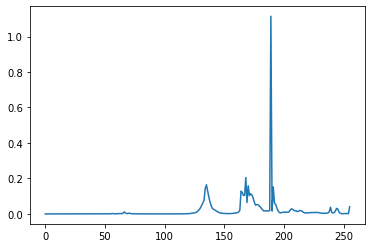

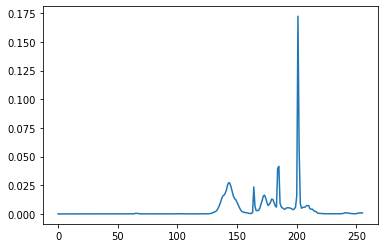

In [51]:

for i in range(9):
    f = random.randrange(0,len(all_hist[i]))
    img = all_hist[i]["landmark_" + str(i) + "_frame_" + str(f)+ ".jpg"]
    
    plt.figure()
    x = plt.plot(img)
    plt.savefig("example_landmark_" + str(i) + "_" + str(f) +".jpg")
    
                         
                     
                     

# plt.plot(all_hist[3]["landmark_3_frame_95.jpg"])
# plt.show()





In [18]:

def knn(img, hist_dict):
    
    hist = cv2.calcHist([img],[0],None,[256],[0,256])
    hist = hist / (output_dimension[0] * output_dimension[1])
    
    min_distance = 1000000
    min_key = ''
    
    for key, value in hist_dict.items():
        
        distance = np.linalg.norm(value-hist)
        
        if distance < min_distance:
            min_distance = distance
            min_key = key
    
    return int(min_key[9])


# img = cv2.imread('/home/angel/Escritorio/Máster/Robots/Practica2/PracticaRobots2/landmarks_img/3/landmark_3_frame_25.jpg', cv2.IMREAD_GRAYSCALE)

filenames = [img for img in glob.glob(directory + "*.jpg")]
for f in filenames:
    img = cv2.imread(f, cv2.IMREAD_GRAYSCALE)
    landmark = knn(img, hist_dict)
    print(f, landmark)
        


/home/angel/Escritorio/Máster/Robots/Practica2/PracticaRobots2/landmark_4_frame_93.jpg 4
/home/angel/Escritorio/Máster/Robots/Practica2/PracticaRobots2/landmark_1_frame_196.jpg 1
/home/angel/Escritorio/Máster/Robots/Practica2/PracticaRobots2/landmark_0_frame_97.jpg 0
/home/angel/Escritorio/Máster/Robots/Practica2/PracticaRobots2/landmark_8_frame_96.jpg 8
/home/angel/Escritorio/Máster/Robots/Practica2/PracticaRobots2/landmark_7_frame_158.jpg 7
/home/angel/Escritorio/Máster/Robots/Practica2/PracticaRobots2/landmark_3_frame_185.jpg 3
/home/angel/Escritorio/Máster/Robots/Practica2/PracticaRobots2/landmark_5_frame_108.jpg 5
/home/angel/Escritorio/Máster/Robots/Practica2/PracticaRobots2/landmark_6_frame_130.jpg 6
/home/angel/Escritorio/Máster/Robots/Practica2/PracticaRobots2/landmark_2_frame_95.jpg 2
